In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Performing PCA with an Undercomplete Linear Autoencoder

Build 3D dataset:

In [16]:
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [17]:
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder]) # Cascade two models

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.1))

/home/benson516/ml/my_env/lib/python3.6/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [18]:
history = autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 1s 16ms/step - loss: 0.5088
Epoch 2/20
2/2 [==============================] - 0s 8ms/step - loss: 0.4299
Epoch 3/20
2/2 [==============================] - 0s 9ms/step - loss: 0.3816
Epoch 4/20
2/2 [==============================] - 0s 15ms/step - loss: 0.3478
Epoch 5/20
2/2 [==============================] - 0s 9ms/step - loss: 0.3225
Epoch 6/20
2/2 [==============================] - 0s 14ms/step - loss: 0.3013
Epoch 7/20
2/2 [==============================] - 0s 9ms/step - loss: 0.2849
Epoch 8/20
2/2 [==============================] - 0s 9ms/step - loss: 0.2712
Epoch 9/20
2/2 [==============================] - 0s 8ms/step - loss: 0.2584
Epoch 10/20
2/2 [==============================] - 0s 7ms/step - loss: 0.2469
Epoch 11/20
2/2 [==============================] - 0s 8ms/step - loss: 0.2350
Epoch 12/20
2/2 [==============================] - 0s 9ms/step - loss: 0.2239
Epoch 13/20
2/2 [==============================] - 0s 10ms/step - loss

In [19]:
codings = encoder.predict(X_train)

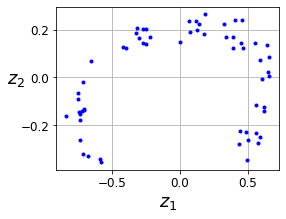

In [20]:
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

# Stacked Autoencoders
## Implementing a Stacked Autoencoder Using Keras

In [34]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [35]:
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(lr=1.5))

In [37]:
history = stacked_ae.fit(X_train, X_train, epochs=10) #,
#                          validation_data=[X_valid, X_valid])

Epoch 1/10
1719/1719 [==============================] - 49s 28ms/step - loss: 0.3050
Epoch 2/10
1719/1719 [==============================] - 48s 28ms/step - loss: 0.2978
Epoch 3/10
1719/1719 [==============================] - 44s 26ms/step - loss: 0.2935 0s - loss: 0.2
Epoch 4/10
1719/1719 [==============================] - 51s 29ms/step - loss: 0.2907
Epoch 5/10
1719/1719 [==============================] - 61s 35ms/step - loss: 0.2889
Epoch 6/10
1719/1719 [==============================] - 72s 42ms/step - loss: 0.2873 0s - loss: 
Epoch 7/10
1719/1719 [==============================] - 86s 50ms/step - loss: 0.2862
Epoch 8/10
1719/1719 [==============================] - 64s 37ms/step - loss: 0.2852
Epoch 9/10
1719/1719 [==============================] - 69s 40ms/step - loss: 0.2844
Epoch 10/10
1719/1719 [==============================] - 65s 38ms/step - loss: 0.2837


## Visualizing the Reconstructions

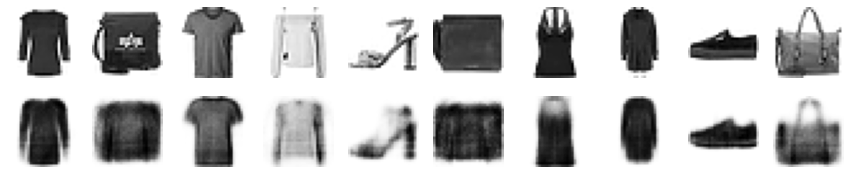

In [42]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    
def show_reconstructions(model, n_images=5):
    reconstructions = model.predict(X_valid[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(X_valid[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])
        
show_reconstructions(stacked_ae, n_images=10)

## Visualizing the Fashion MNIST Dataset

In [44]:
from sklearn.manifold import TSNE

X_valid_compressed = stacked_encoder.predict(X_valid)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)

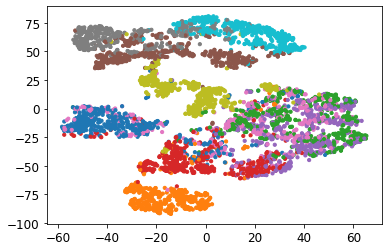

In [45]:
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap="tab10")

## Tying Weights

In [46]:
class DenseTranspose(keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        self.dense = dense
        self.activation = keras.activations.get(activation)
        super().__init__(**kwargs)
    def build(self, batch_input_shape):
        self.biases = self.add_weight(name="bias", initializer="zeros",
                                      shape=[self.dense.input_shape[-1]])
        super().build(batch_input_shape)
    def call(self, inputs):
        z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
        return self.activation(z + self.biases)

In [47]:
dense_1 = keras.layers.Dense(100, activation="selu")
dense_2 = keras.layers.Dense(30, activation="selu")

tied_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    dense_1,
    dense_2
])
tied_decoder = keras.models.Sequential([
    DenseTranspose(dense_2, activation="selu"),
    DenseTranspose(dense_1, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

tied_ae = keras.models.Sequential([tied_encoder, tied_decoder])

# Convolutional Autoencoders

In [51]:
conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, kernel_size=3, padding="same", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2)
])
conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="valid",
                                 activation="selu",
                                 input_shape=[3, 3, 64]),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="same",
                                 activation="selu"),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="same",
                                 activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])

# Recurrent Autoencoders

In [52]:
recurrent_encoder = keras.models.Sequential([
    keras.layers.LSTM(100, return_sequences=True, input_shape=[None, 28]),
    keras.layers.LSTM(30)
])
recurrent_decoder = keras.models.Sequential([
    keras.layers.RepeatVector(28, input_shape=[30]),
    keras.layers.LSTM(100, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(28, activation="sigmoid"))
])
recurrent_ae = keras.models.Sequential([recurrent_encoder, recurrent_decoder])

# Denoising Autoencoder

In [56]:
dropout_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])
dropout_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28*28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
dropout_ae = keras.models.Sequential([dropout_encoder, dropout_decoder])

# Sparse Autoencoders

In [59]:
sparse_l1_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(300, activation="sigmoid"),
    keras.layers.ActivityRegularization(l1=1e-3)
])
sparse_l1_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[300]),
    keras.layers.Dense(28*28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
sparse_l1_ae = keras.models.Sequential([sparse_l1_encoder, sparse_l1_decoder])

Sparse autoencoder based on KL divergence

In [67]:
K = keras.backend
kl_divergence = keras.losses.kullback_leibler_divergence

class KLDivergenceRegularizer(keras.regularizers.Regularizer):
    def __init__(self, weight, target=0.1):
        self.weight = weight
        self.target = target
    def __call__(self, inputs):
        mean_activities = K.mean(inputs, axis=0)
        return self.weight * (
            kl_divergence(self.target, mean_activities) + 
            kl_divergence(1.-self.target, 1.-mean_activities))

In [69]:
kld_reg = KLDivergenceRegularizer(weight=0.05, target=0.1)
sparse_kl_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(300, activation="sigmoid", activity_regularizer=kld_reg)
])
sparse_kl_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[300]),
    keras.layers.Dense(28*28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
sparse_kl_ae = keras.models.Sequential([sparse_kl_encoder, sparse_kl_decoder])

# Variational Autoencoders

Variational autoencoder for Fashion MNIST with $\gamma$ tweak

In [71]:
class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean

In [87]:
codings_size = 10
# Encoder
inputs = keras.layers.Input(shape=[28, 28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation="selu")(z)
z = keras.layers.Dense(100, activation="selu")(z)
codings_mean = keras.layers.Dense(codings_size)(z)    # mu
codings_log_var = keras.layers.Dense(codings_size)(z) # gamma
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

In [75]:
# Decoder
decoder_inputs = keras.layers.Input(shape=[coding_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(28*28, activation="sigmoid")(x)
outputs = keras.layers.Reshape([28, 28])(x)
variational_decoder = keras.Model(inputs=[decoder_inputs], outputs=[outputs])

In [76]:
# Autoencoder = encoder + decoder
_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.Model(inputs=[inputs], outputs=[reconstructions])

In [77]:
# Losses
latent_loss = -0.5 * K.sum(
    1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean), 
    axis=-1)
variational_ae.add_loss(K.mean(latent_loss) / 784.)
variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [79]:
history = variational_ae.fit(X_train, X_train, epochs=50, batch_size=128) # ,
#                              validation_data=[X_valid, X_valid])

Epoch 1/50
430/430 [==============================] - 37s 83ms/step - loss: 0.3428
Epoch 2/50
430/430 [==============================] - 37s 86ms/step - loss: 0.3329
Epoch 3/50
430/430 [==============================] - 37s 86ms/step - loss: 0.3280
Epoch 4/50
430/430 [==============================] - 28s 65ms/step - loss: 0.3247
Epoch 5/50
430/430 [==============================] - 26s 62ms/step - loss: 0.3226
Epoch 6/50
430/430 [==============================] - 31s 73ms/step - loss: 0.3209
Epoch 7/50
430/430 [==============================] - 32s 75ms/step - loss: 0.3196 0s - los
Epoch 8/50
430/430 [==============================] - 34s 80ms/step - loss: 0.3186
Epoch 9/50
430/430 [==============================] - 45s 104ms/step - loss: 0.3177
Epoch 10/50
430/430 [==============================] - 49s 113ms/step - loss: 0.3169
Epoch 11/50
430/430 [==============================] - 46s 107ms/step - loss: 0.3164
Epoch 12/50
430/430 [==============================] - ETA: 0s - loss: 0.

## Generating Fashion MNIST Images

In [93]:
codings = tf.random.normal(shape=[12, codings_size])
images = variational_decoder(codings).numpy()

In [94]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

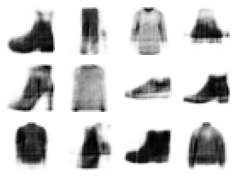

In [95]:
plot_multiple_images(images, 4)

Semantic interpolation

In [96]:
codings_grid = tf.reshape(codings, [1, 3, 4, codings_size])
larger_grid = tf.image.resize(codings_grid, size=[5, 7])
interpolated_codings = tf.reshape(larger_grid, [-1, codings_size])
images = variational_decoder(interpolated_codings).numpy()

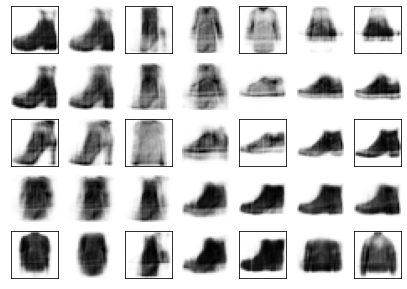

In [97]:
plt.figure(figsize=(7, 5))
for index, image in enumerate(images):
    plt.subplot(5, 7, index + 1)
    if index%7%2==0 and index//7%2==0:
        plt.gca().get_xaxis().set_visible(False)
        plt.gca().get_yaxis().set_visible(False)
    else:
        plt.axis("off")
    plt.imshow(image, cmap="binary")